<a href="https://colab.research.google.com/github/imrazack-cisco/bits/blob/main/Optimization%20of%20Lab%20Resources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

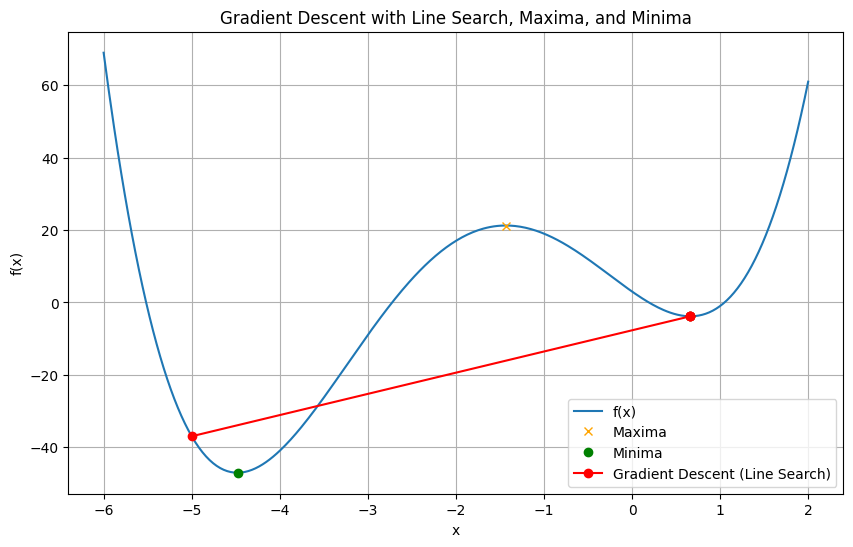

Minimum x (Line Search): 0.6623814152934492
Minimum f(x) (Line Search): -3.8399026250389543


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define the function and its gradient
def f(x):
    return x**4 + 7*x**3 + 5*x**2 - 17*x + 3

def gradient(x):
    return 4*x**3 + 21*x**2 + 10*x - 17

def golden_section_search(x, direction, initial_step=1, tolerance=1e-4):
    a = 0.0
    b = initial_step
    golden_ratio = (np.sqrt(5) - 1) / 2

    while abs(b - a) > tolerance:
        c = b - golden_ratio * (b - a)
        d = a + golden_ratio * (b - a)

        if f(x + c * direction) < f(x + d * direction):
            b = d
        else:
            a = c
    return (b + a) / 2

def gradient_descent_with_line_search(initial_x, tolerance=1e-6, max_iterations=100):
    x = initial_x
    x_history = [x]
    y_history = [f(x)]
    for _ in range(max_iterations):
        grad = gradient(x)
        direction = -grad
        learning_rate = golden_section_search(x, direction)
        new_x = x + learning_rate * direction
        x_history.append(new_x)
        y_history.append(f(new_x))
        if abs(new_x - x) < tolerance:
            break
        x = new_x
    return x, x_history, y_history

# Find Maxima and Minima
x_range = np.linspace(-6, 2, 400)
y_values = f(x_range)
peaks, _ = find_peaks(y_values) # Find maxima (peaks)
minima_indices = np.where(np.diff(np.sign(np.diff(y_values))) > 0)[0] + 1 # Find minima

# Set initial x and run gradient descent
initial_x = -5  # Start near the minimum on the left
min_x, x_history, y_history = gradient_descent_with_line_search(initial_x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_values, label="f(x)")

# Plot Maxima and Minima
plt.plot(x_range[peaks], y_values[peaks], "x", color='orange', label="Maxima")
plt.plot(x_range[minima_indices], y_values[minima_indices], "o", color='green', label="Minima")

# Plot Gradient Descent with Line Search
plt.plot(x_history, y_history, marker='o', linestyle='-', color='red', label="Gradient Descent (Line Search)")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent with Line Search, Maxima, and Minima")
plt.legend()
plt.grid(True)
plt.show()

print(f"Minimum x (Line Search): {min_x}")
print(f"Minimum f(x) (Line Search): {f(min_x)}")